In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets.samples_generator import make_circles

In [3]:
X,y=make_circles(n_samples=1000,noise=0.1,factor=0.2,random_state=0)

In [8]:
print(X.shape)
print(y.shape)

(1000, 2)
(1000,)


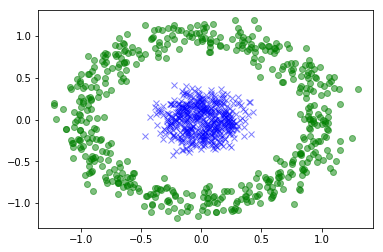

In [11]:
plt.plot(X[y==0,0],X[y==0,1],'og',alpha=0.5)
plt.plot(X[y==1,0],X[y==1,1],'xb',alpha=0.5)

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [15]:
model=Sequential()
model.add(Dense(4,input_shape=(2,),activation='tanh'))

In [16]:
model.add(Dense(1,activation='sigmoid'))

In [17]:
model.compile(SGD(lr=0.5),'binary_crossentropy',metrics=['accuracy'])

In [19]:
model.fit(X,y,epochs=15)

Epoch 1/15
1000/1000 [==============================] - 0s 49us/step - loss: 0.6327 - acc: 0.6740
Epoch 2/15
1000/1000 [==============================] - 0s 52us/step - loss: 0.5674 - acc: 0.7490
Epoch 3/15
1000/1000 [==============================] - 0s 46us/step - loss: 0.4568 - acc: 0.8510
Epoch 4/15
1000/1000 [==============================] - 0s 63us/step - loss: 0.3424 - acc: 0.9290
Epoch 5/15
1000/1000 [==============================] - 0s 44us/step - loss: 0.2497 - acc: 0.9910
Epoch 6/15
1000/1000 [==============================] - 0s 43us/step - loss: 0.1870 - acc: 1.0000
Epoch 7/15
1000/1000 [==============================] - 0s 50us/step - loss: 0.1469 - acc: 1.0000
Epoch 8/15
1000/1000 [==============================] - 0s 47us/step - loss: 0.1195 - acc: 1.0000
Epoch 9/15
1000/1000 [==============================] - 0s 45us/step - loss: 0.1010 - acc: 1.0000
Epoch 10/15
1000/1000 [==============================] - 0s 48us/step - loss: 0.0867 - acc: 1.0000
Epoch 11/15
1000/10

In [21]:
hticks=np.linspace(-1.5,1.5,101)
vticks=np.linspace(-1.5,1.5,101)
aa,bb=np.meshgrid(hticks,vticks)
ab=np.c_[aa.ravel(),bb.ravel()]
c=model.predict(ab)
cc=c.reshape(aa.shape)

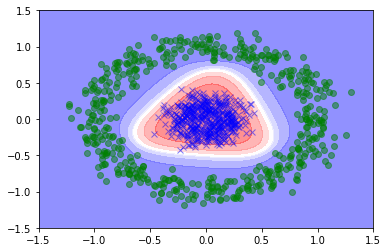

In [22]:
plt.contourf(aa,bb,cc,cmap='bwr',alpha=0.5)
plt.plot(X[y==0,0],X[y==0,1],'og',alpha=0.5)
plt.plot(X[y==1,0],X[y==1,1],'xb',alpha=0.5)

# Classification Example

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [24]:
df=pd.read_csv('user_visit_duration.csv')
df.head(2)

,Time (min),Buy
0,2.000000,0
1,0.683333,0


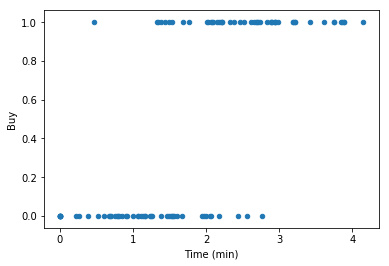

In [25]:
df.plot(kind='scatter',x='Time (min)',y='Buy')

In [26]:
model=Sequential()

In [27]:
model.add(Dense(1,input_shape=(1,),activation='sigmoid'))

In [28]:
model.compile(SGD(lr=0.5),'binary_crossentropy',metrics=['accuracy'])

In [29]:
X=df[['Time (min)']].values
y=df['Buy'].values

model.fit(X,y,epochs=20)

Epoch 1/20
100/100 [==============================] - 0s 2ms/step - loss: 0.7213 - acc: 0.5200
Epoch 2/20
100/100 [==============================] - 0s 90us/step - loss: 0.6095 - acc: 0.6700
Epoch 3/20
100/100 [==============================] - 0s 80us/step - loss: 0.5986 - acc: 0.6700
Epoch 4/20
100/100 [==============================] - 0s 80us/step - loss: 0.5711 - acc: 0.6600
Epoch 5/20
100/100 [==============================] - 0s 90us/step - loss: 0.5669 - acc: 0.6600
Epoch 6/20
100/100 [==============================] - 0s 80us/step - loss: 0.5449 - acc: 0.7900
Epoch 7/20
100/100 [==============================] - 0s 80us/step - loss: 0.5056 - acc: 0.8000
Epoch 8/20
100/100 [==============================] - 0s 60us/step - loss: 0.4929 - acc: 0.8100
Epoch 9/20
100/100 [==============================] - 0s 70us/step - loss: 0.4794 - acc: 0.8200
Epoch 10/20
100/100 [==============================] - 0s 70us/step - loss: 0.4840 - acc: 0.8100
Epoch 11/20
100/100 [===================

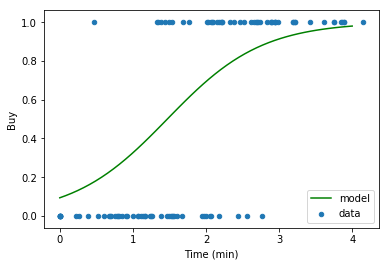

In [30]:
ax=df.plot(kind='scatter',x='Time (min)',y='Buy')
temp=np.linspace(0,4)
ax.plot(temp,model.predict(temp),color='green')
plt.legend(['model','data'])

In [31]:
y_pred=model.predict(X)
y_class_pred=y_pred>0.5

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
print(accuracy_score(y,y_class_pred))

0.79


In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [37]:
params=model.get_weights()
params=[np.zeros(w.shape) for w in params]
model.set_weights(params)

In [38]:
model.fit(X_train,y_train,epochs=25,verbose=0)

In [41]:

y_pred=model.predict(X_test)
y_class_pred=y_pred>0.5

In [42]:
print(accuracy_score(y_test,y_class_pred))

0.9
